In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 2 Reinforcement learning (RL)

### Question 1: 
For visualization purpose, generate heat maps of
Reward function 1 and Reward function 2. For the heat maps, make sure you
display the coloring scale. You will have 2 plots for this question

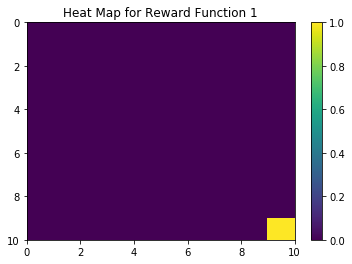

In [3]:
r1 = [[0 for _ in range(10)] for _ in range(10)]
r1[9][9] = 1
plt.pcolor(r1, cmap = "viridis")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 1")
plt.show()

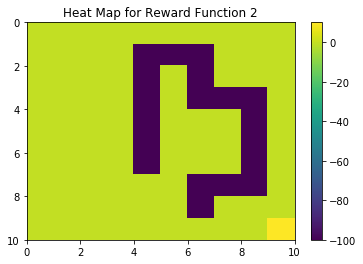

In [7]:
r2 = [[0 for _ in range(10)] for _ in range(10)]
r2[1][4:7] = [-100 for _ in range(3)]
r2[3][6:9] = [-100 for _ in range(3)]
r2[7][6:9] = [-100 for _ in range(3)]
r2[2][4] = -100
r2[2][6] = -100
r2[3][4] = -100
r2[4][4] = -100
r2[4][8] = -100
r2[5][4] = -100
r2[5][8] = -100
r2[6][4] = -100
r2[6][8] = -100
r2[8][6] = -100
r2[9][9] = 10
plt.pcolor(r2, cmap = "viridis")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 2")
plt.show()

# 3 Optimal policy learning using RL algorithms

### Question 2: 
Create the environment of the agent using the in-
formation provided in section 2. To be specic, create the MDP by setting up
the state-space, action set, transition probabilities, discount factor, and reward
function. For creating the environment, use the following set of parameters:
- Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure 1)
- Number of actions = 4 (set of possible actions is displayed in gure 2)
- w = 0.1
- Discount factor = 0.8
- Reward function 1

After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have
to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ep = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this
question, you should have 1 plot.

In [19]:
values = [0 for _ in range(100)]
threshold = 0.01
actions = [-10, -1, 10, 1]
w = 0.1
gamma = 0.8
reward = []
r1 = np.array(r1).transpose()
for lines in r1:
    reward += list(lines)

In [20]:
def compute_prob(c_state, n_state, move, p):
    left = c_state + actions[0]
    up = c_state + actions[1]
    right = c_state + actions[2]
    down = c_state + actions[3]
    if n_state == left:
        if move == 0:
            return 1-p+p/4
        else:
            return p/4
    elif n_state == up:
        if move == 1:
            return 1-p+p/4
        else:
            return p/4
    elif n_state == right:
        if move == 2:
            return 1-p+p/4
        else:
            return p/4
    elif n_state == down:
        if move == 3:
            return 1-p+p/4
        else:
            return p/4
    elif n_state == c_state:
        record = 0
        if left < 0:
            if move == 0:
                record += (1-p+p/4)
            else:
                record += p/4
        if right > 99:
            if move == 2:
                record += (1-p+p/4)
            else:
                record += p/4
        if up % 10 == 9:
            if move == 1:
                record += (1-p+p/4)
            else:
                record += p/4
        if down % 10 == 0:
            if move == 3:
                record += (1-p+p/4)
            else:
                record += p/4
        return record
    else:
        return 0

In [21]:
def next_p(c_state, move, prob, gamma, reward, values):
    left = c_state + actions[0]
    right = c_state + actions[2]
    up = c_state + actions[1]
    down = c_state + actions[3]
    neighbours = [left, right, up, down, c_state]
    result = 0
    for neigh in neighbours:
        if neigh < 0 or neigh > 99 or (c_state % 10 == 0 and neigh % 10 == 9) or (c_state % 10 == 9 and neigh % 10 == 0):
            continue
        result += compute_prob(c_state, neigh, move, prob) * (reward[neigh] + gamma * values[neigh])
    return result

In [22]:
def optimal_state(values, w, gamma, reward, threshold):
    for state in range(100):
        values[state] = 0
    delta = float('inf')
    while delta > threshold:
        delta = 0
        temp = values[:]
        for state in range(100):
            v = values[state]
            values[state] = max(next_p(state, 0, w, gamma, reward, temp),
                                next_p(state, 1, w, gamma, reward, temp),
                                next_p(state, 2, w, gamma, reward, temp),
                                next_p(state, 3, w, gamma, reward, temp))
            delta = max(delta, abs(v - values[state]))
    return values

[]

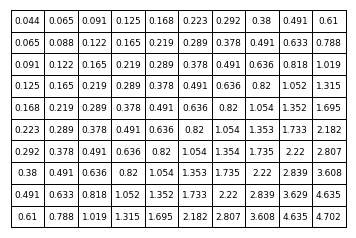

In [24]:
values = optimal_state(values, w, gamma, reward, threshold)
g1 = np.round(values, decimals=3).reshape(10, 10).transpose()
tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])


### Question 3: 
Generate a heat map of the optimal state values across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

Text(0.5,1,'Heat Map of Optimal State Values for Reward Function 1')

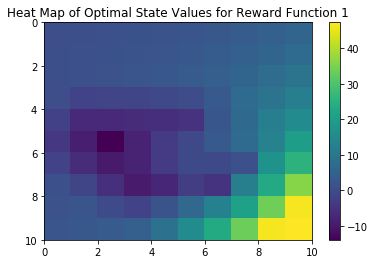

In [24]:
plt.figure()
plt.pcolor(g1, cmap = "viridis")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 1")

### Question 5: 
Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows.

Does the optimal policy of the agent match your intuition? Please provide a
brief explanation. Is it possible for the agent to compute the optimal action to
take at each state by observing the optimal values of it's neighboring states? In
this question, you should have 1 plot.

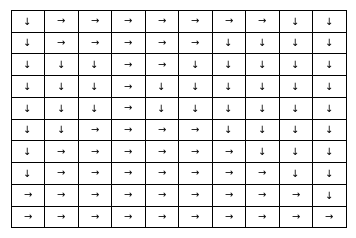

In [25]:
x = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    x[state] = arrows[np.argmax([compute(state, 0, w, gamma, reward, values),
                                   compute(state, 1, w, gamma, reward, values),
                                   compute(state, 2, w, gamma, reward, values),
                                   compute(state, 3, w, gamma, reward, values)])]
y = np.array(x).reshape(10, 10).transpose()
plt.figure()
tb = plt.table(cellText=y, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Question 6: 
Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the
grid. For visualization purpose, you should generate a figure similar to that
of figure 1 but with the number of state replaced by the optimal value of that
state. In this question, you should have 1 plot.

[]

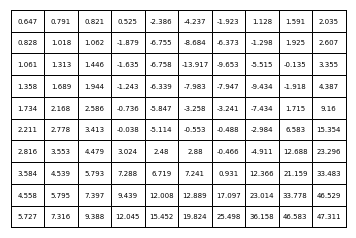

In [28]:
reward = []
r2 = np.array(r2).transpose()
for lines in r2:
    reward += list(lines)

values = optimal_state(values, w, gamma, reward, threshold)
g1 = np.round(values, decimals=3).reshape(10, 10).transpose()
tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

### Question 7: 
Generate a heat map of the optimal state values (found
in question 6) across the 2-D grid. For generating the heat map, you can use
the same function provided in the hint earlier.

Text(0.5,1,'Heat Map of Optimal State Values for Reward Function 2')

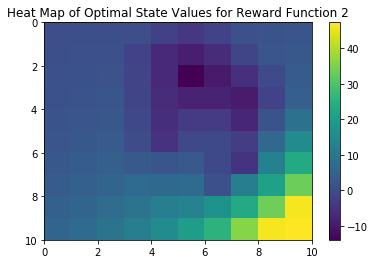

In [29]:
plt.figure()
plt.pcolor(g1, cmap = "viridis")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 2")